C:\Users\ASUS\AppData\Local\Temp\ipykernel_8036\1568048077.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')



### Dataset Overview ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB
None

First

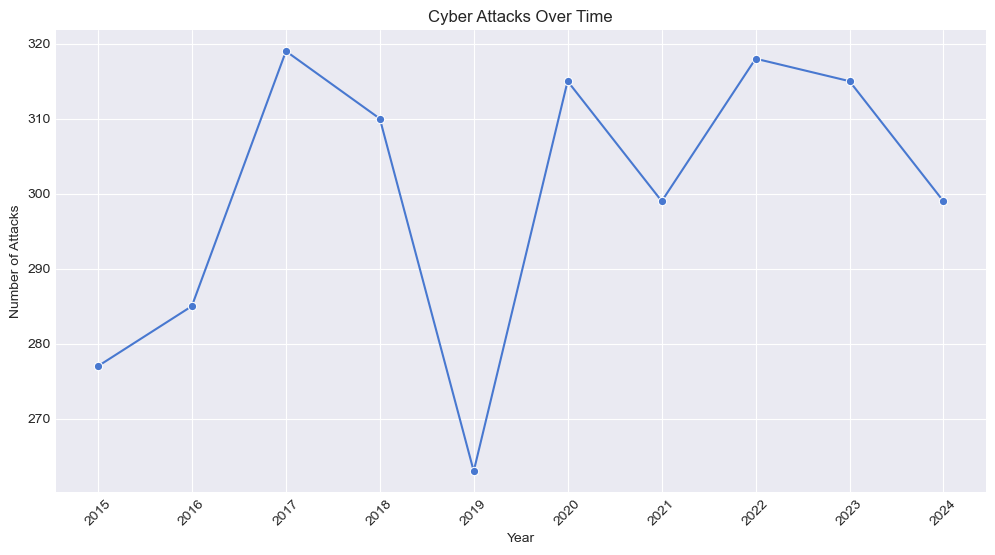

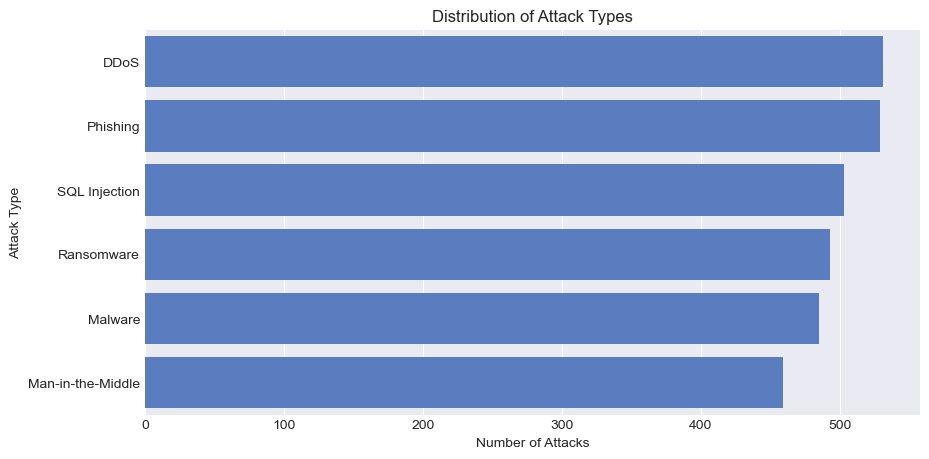

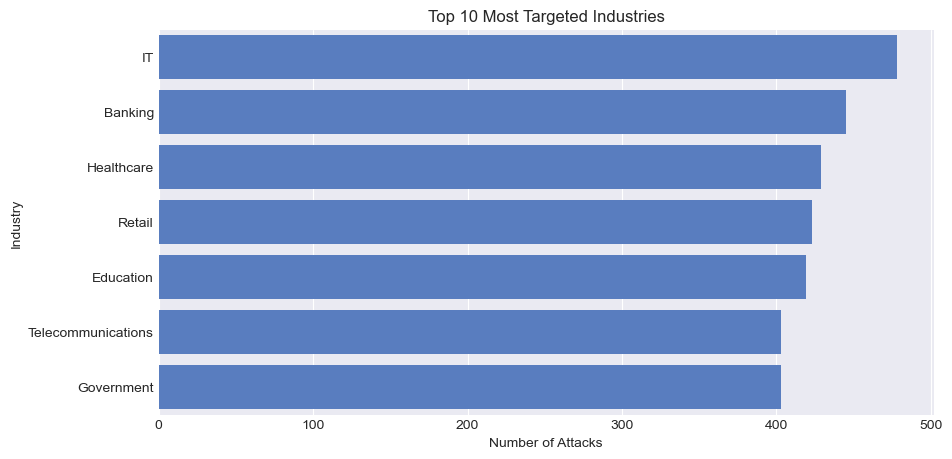

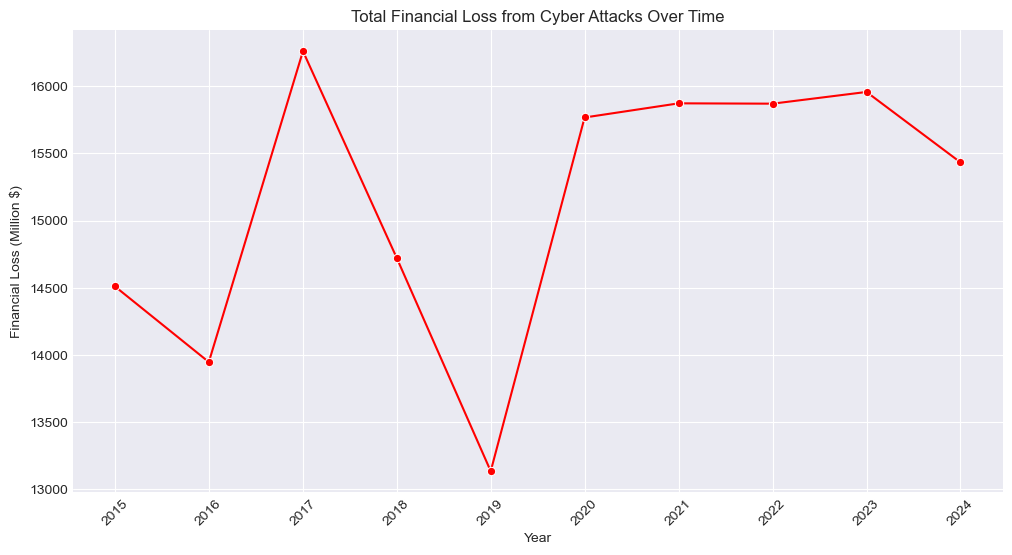

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8036\1568048077.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_loss_by_attack.index, x=avg_loss_by_attack.values, palette='coolwarm')


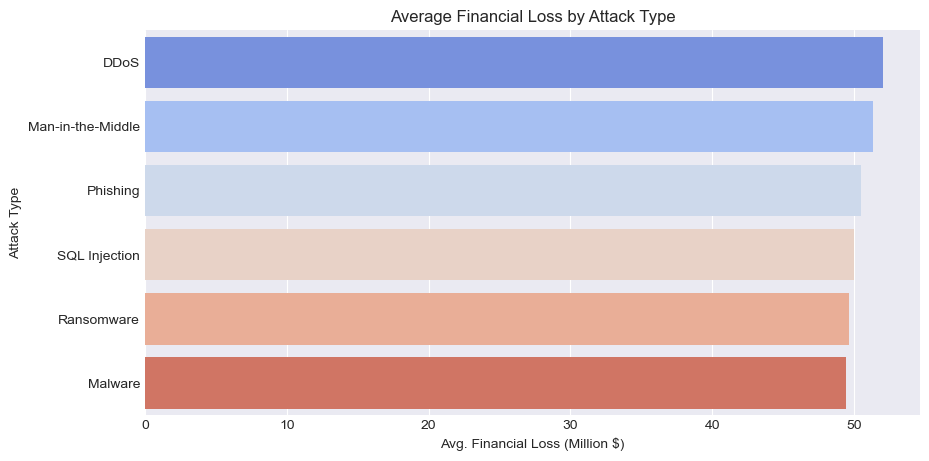

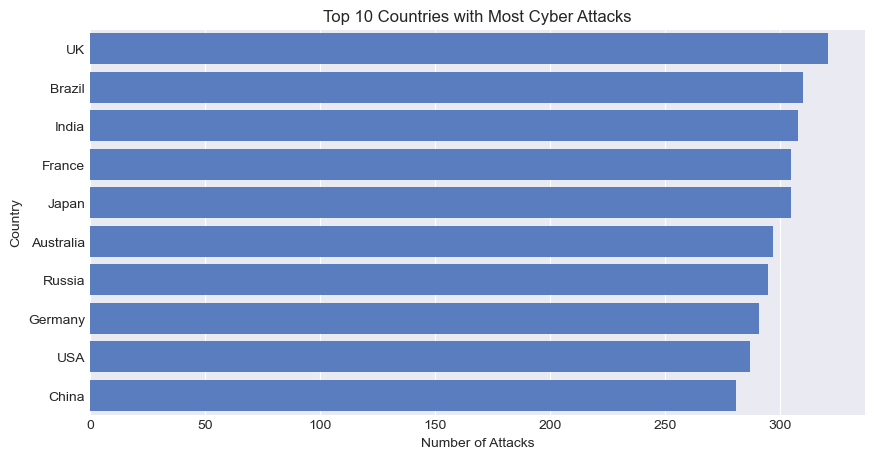

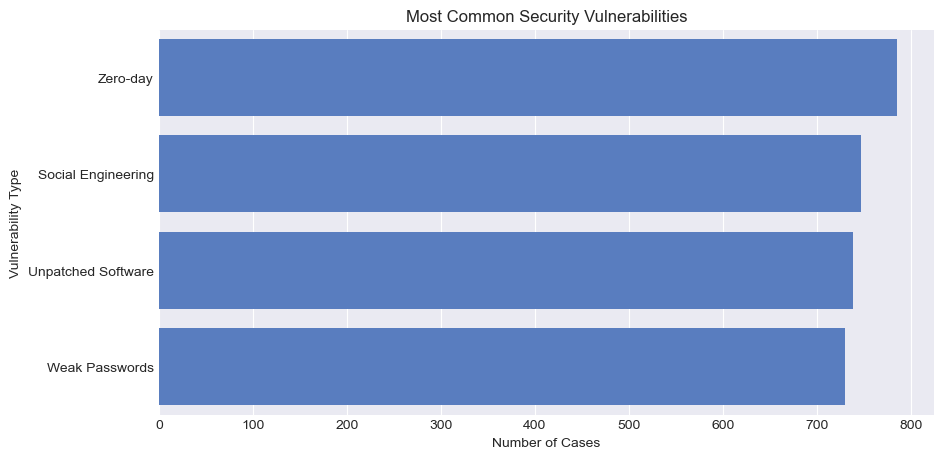

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8036\1568048077.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_resolution_time.index, x=avg_resolution_time.values, palette='Blues_r')


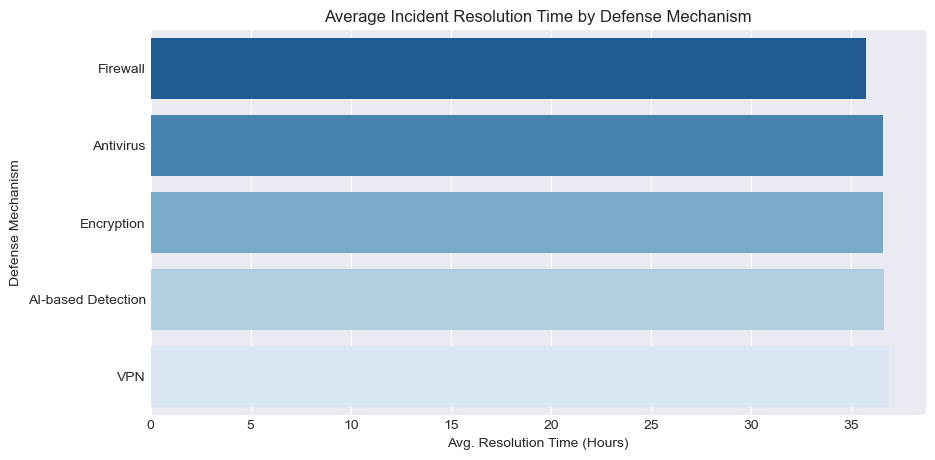


### Key Statistics ###
Total recorded cyber attacks: 3,000
Total financial loss: $151,478.91 million
Average financial loss per attack: $50.49 million
Average incident resolution time: 36.48 hours
Total affected users: 1,514,052,409

Most common attack type: DDoS
Most targeted industry: IT
Most effective defense mechanism (fastest resolution): Firewall


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization aesthetics
plt.style.use('seaborn-darkgrid')
sns.set_palette("muted")

# Load the dataset
file_path = "Global_Cybersecurity_Threats_2015-2024.csv"
df = pd.read_csv(file_path)

# Quick dataset overview
print("\n### Dataset Overview ###")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

# --- Data Cleaning ---
print("\n### Checking for Missing Values ###")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Show only columns with missing values

print("\n### Checking for Duplicates ###")
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows found: {duplicate_count}")
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")

# Convert Year column to datetime format (assuming it's in YYYY format)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Strip column names of any accidental spaces
df.columns = df.columns.str.strip()

# --- Data Analysis & Visualizations ---

## Cyber Attacks Over Time
plt.figure(figsize=(12, 6))
yearly_attacks = df.groupby('Year').size()
sns.lineplot(x=yearly_attacks.index, y=yearly_attacks.values, marker='o')
plt.title('Cyber Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

## Attack Type Distribution
plt.figure(figsize=(10, 5))
attack_counts = df['Attack Type'].value_counts()
sns.barplot(y=attack_counts.index, x=attack_counts.values)
plt.title('Distribution of Attack Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()

## Industry Impact
plt.figure(figsize=(10, 5))
industry_counts = df['Target Industry'].value_counts().head(10)  # Show top 10 affected industries
sns.barplot(y=industry_counts.index, x=industry_counts.values)
plt.title('Top 10 Most Targeted Industries')
plt.xlabel('Number of Attacks')
plt.ylabel('Industry')
plt.show()

## Financial Loss Trends
plt.figure(figsize=(12, 6))
financial_loss = df.groupby('Year')['Financial Loss (in Million $)'].sum()
sns.lineplot(x=financial_loss.index, y=financial_loss.values, marker='o', color='red')
plt.title('Total Financial Loss from Cyber Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Financial Loss (Million $)')
plt.xticks(rotation=45)
plt.show()

## Financial Loss by Attack Type
plt.figure(figsize=(10, 5))
avg_loss_by_attack = df.groupby('Attack Type')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)
sns.barplot(y=avg_loss_by_attack.index, x=avg_loss_by_attack.values, palette='coolwarm')
plt.title('Average Financial Loss by Attack Type')
plt.xlabel('Avg. Financial Loss (Million $)')
plt.ylabel('Attack Type')
plt.show()

## Top 10 Most Attacked Countries
plt.figure(figsize=(10, 5))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Countries with Most Cyber Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.show()

## Security Vulnerabilities Distribution
plt.figure(figsize=(10, 5))
vulnerability_counts = df['Security Vulnerability Type'].value_counts().head(10)
sns.barplot(y=vulnerability_counts.index, x=vulnerability_counts.values)
plt.title('Most Common Security Vulnerabilities')
plt.xlabel('Number of Cases')
plt.ylabel('Vulnerability Type')
plt.show()

## Defense Mechanism Effectiveness
plt.figure(figsize=(10, 5))
avg_resolution_time = df.groupby('Defense Mechanism Used')['Incident Resolution Time (in Hours)'].mean().sort_values()
sns.barplot(y=avg_resolution_time.index, x=avg_resolution_time.values, palette='Blues_r')
plt.title('Average Incident Resolution Time by Defense Mechanism')
plt.xlabel('Avg. Resolution Time (Hours)')
plt.ylabel('Defense Mechanism')
plt.show()

# --- Key Statistics & Insights ---
print("\n### Key Statistics ###")
print(f"Total recorded cyber attacks: {len(df):,}")
print(f"Total financial loss: ${df['Financial Loss (in Million $)'].sum():,.2f} million")
print(f"Average financial loss per attack: ${df['Financial Loss (in Million $)'].mean():,.2f} million")
print(f"Average incident resolution time: {df['Incident Resolution Time (in Hours)'].mean():.2f} hours")
print(f"Total affected users: {df['Number of Affected Users'].sum():,}")

# Finding the most common attack type and most affected industry
most_common_attack = df['Attack Type'].mode()[0]
most_targeted_industry = df['Target Industry'].mode()[0]
best_defense = df.groupby('Defense Mechanism Used')['Incident Resolution Time (in Hours)'].mean().idxmin()

print(f"\nMost common attack type: {most_common_attack}")
print(f"Most targeted industry: {most_targeted_industry}")
print(f"Most effective defense mechanism (fastest resolution): {best_defense}")
